----
# Laboratorium 6 - Układy stabilne i minimalnofazowe
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów Wydziału Informatyki i Telekomunikacji Politechniki Poznańskiej 

----
## 0. Zagadnienia do opanowania przed zajęciami
----

* badanie stabilności układu (stabilność w sensie BIBO) 
* analiza układów zamkniętych pętlą sprzężenia zwrotnego
* analiza układów minimalnofazowych
* zera i bieguny transmitancji  

Funkcje z biblioteki *scipy.signal* potrzebne do zrealizowania ćwiczenia:  
`scipy.signal.freqresp`, `scipy.signal.signal.tf2ss`,  `scipy.signal.impulse`

Dokumentacja i opisy poszczególnych funkcji *scipy.signal*:  
https://docs.scipy.org/doc/scipy/reference/signal.html    



In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal



poles_figsize  =(8, 8)
default_figsize=(14, 8)

---- 
## 1. Pojęcie stabilności
---- 
* Co to znaczy że układ jest stabilny?
* Jakie są kryteria stabilności?
* Jak sprawdzić czy układ jest stabilny?

---- 
## 2. Zbadaj stabilność w sensie BIBO
---- 
| | |
|------------------------------------------|------------------------------------|
|$$H(s) = {{s^2-2s+3} \over {s^2+2s+ 1}}$$  |  $$H(s) = {{s^2+1}\over{s^2+3s+1}}$$|
|$$ H(s) = {{1} \over {s^2 + 2}} $$  |$$ H(s) = {{1} \over {s^2 +8s+15}} $$|
|$$ H(s) = {{s^2-2s+3} \over {s^2 + 2}} $$  |$$ H(s) = {{1} \over {s^2 +6s-7}} $$|
|$$ H(s) = {{s + 2} \over {s + 1}} $$  |$$ H(s) = {{1} \over {s+1}} $$|
|$$ H(s) = {{s - 1} \over {s + 1}} $$|$$ H(s) = {{1} \over {s-1}} $$|
|$$ H(s) = {{2s+3} \over {s^2 + 4s + 4}} $$|$$ H(s) = {{s+1} \over {s+ 2}} $$|
|$$ H(s) = {{s^4+2s^3+2s^2+2} \over {s^3-2s^2 + 4s + 1}} $$|$$ H(s) = {{s-1} \over {s+ 2}} $$|
W tym celu zdefiniuj wektor złożony ze współczynników przy każdej zmiennej s do stopnia danego wielomianu. Wykorzystaj funkcję np.poly1d oraz np.roots. Uwaga, jeśli dla układu definiujemy transmitancję jako współczynniki licznika i mianownika (num, den), to współczynniki powinny być podane w kolejności malejącego wykładnika (np. s^2 + 3s + 5 byłyby reprezentowane jako [1, 3, 5]). W miejsce R i C podstaw wartości jednostkowe. Przedstaw położenie biegunów na płąszczyźnie zespolonej krzyżykami. 


mianownik 
    2
1 x + 2 x + 1 
 bieguny [-1. -1.]
mianownik 
    2
1 x + 2 
 bieguny [-0.+1.41421356j  0.-1.41421356j]
mianownik 
    2
1 x + 2 
 bieguny [-0.+1.41421356j  0.-1.41421356j]
mianownik 
  
1 x + 1 
 bieguny [-1.]
mianownik 
  
1 x + 1 
 bieguny [-1.]
mianownik 
    2
1 x + 4 x + 4 
 bieguny [-2. -2.]
mianownik 
    3     2
1 x + 2 x + 4 x + 1 
 bieguny [-0.85761262+1.66614757j -0.85761262-1.66614757j -0.28477476+0.j        ]
mianownik 
    2
1 x + 3 x + 1 
 bieguny [-2.61803399 -0.38196601]
mianownik 
    2
1 x + 8 x + 15 
 bieguny [-5. -3.]
mianownik 
    2
1 x + 6 x - 7 
 bieguny [-7.  1.]
mianownik 
  
1 x + 1 
 bieguny [-1.]
mianownik 
  
1 x - 1 
 bieguny [1.]
mianownik 
  
1 x + 2 
 bieguny [-2.]
mianownik 
  
1 x + 2 
 bieguny [-2.]


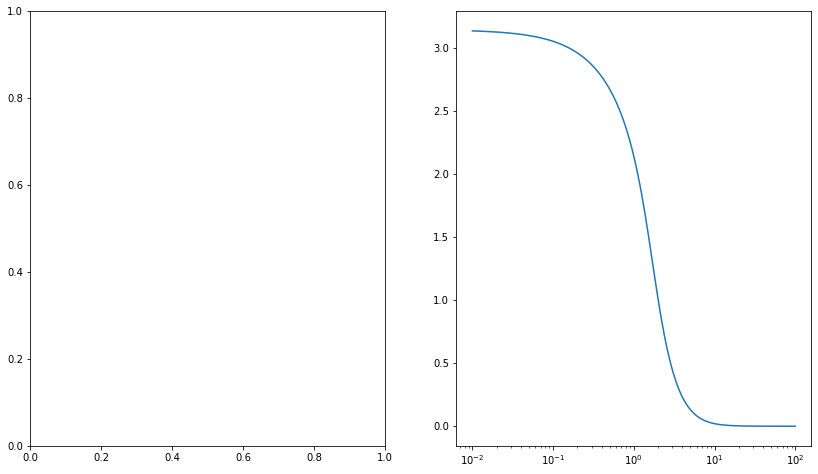

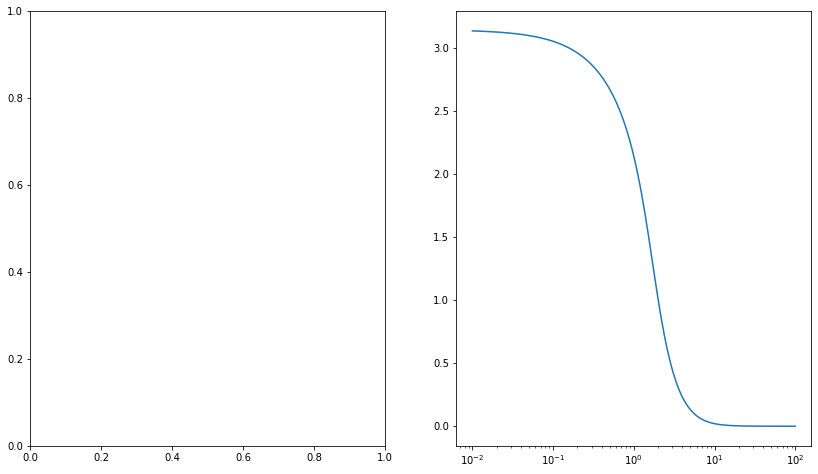

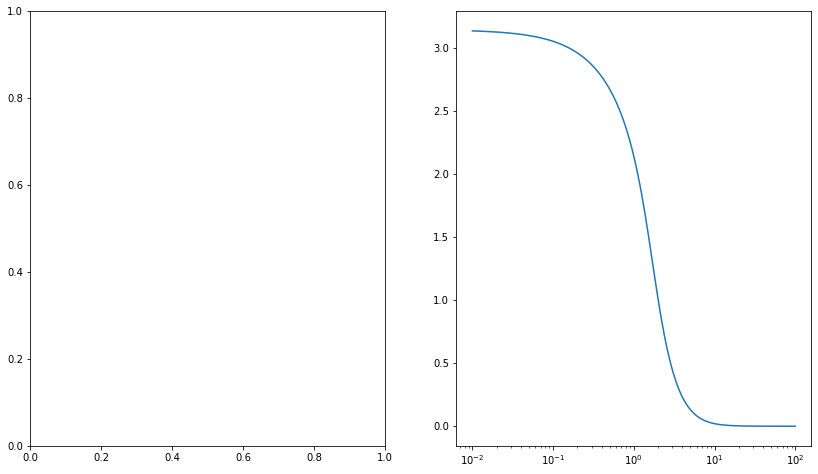

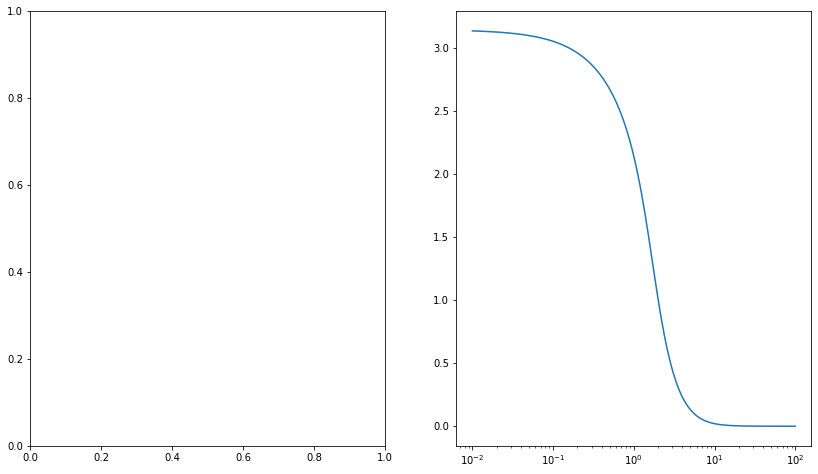

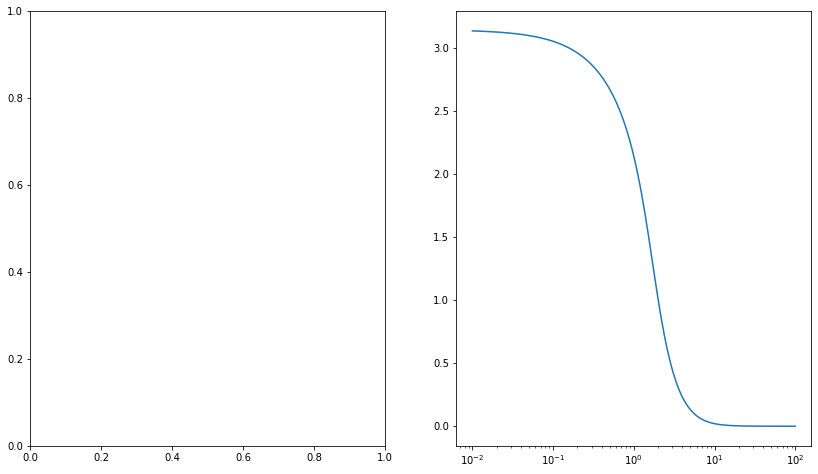

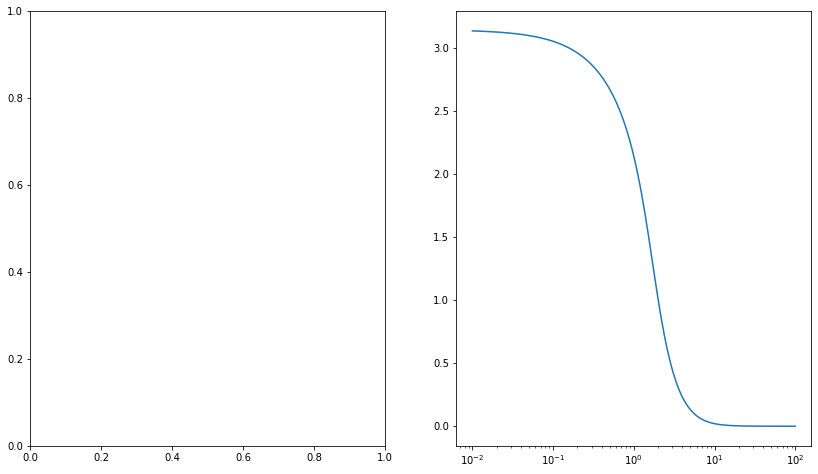

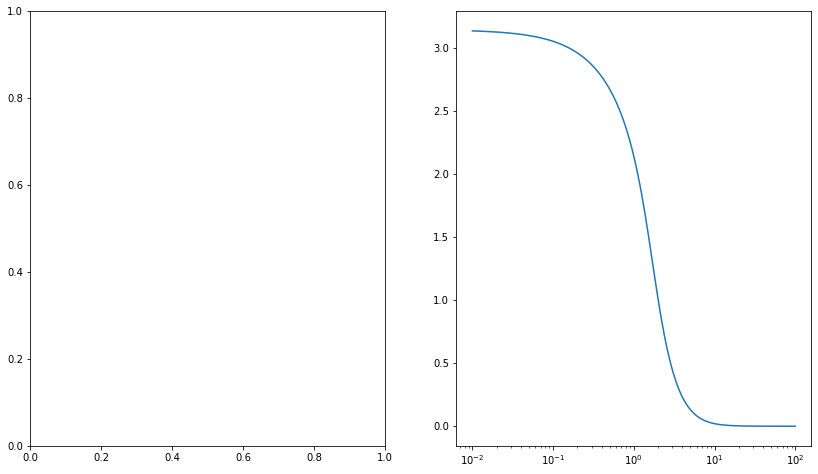

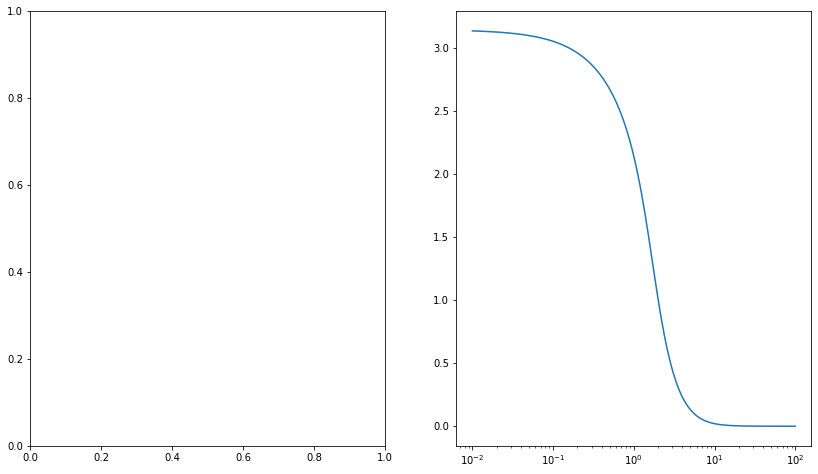

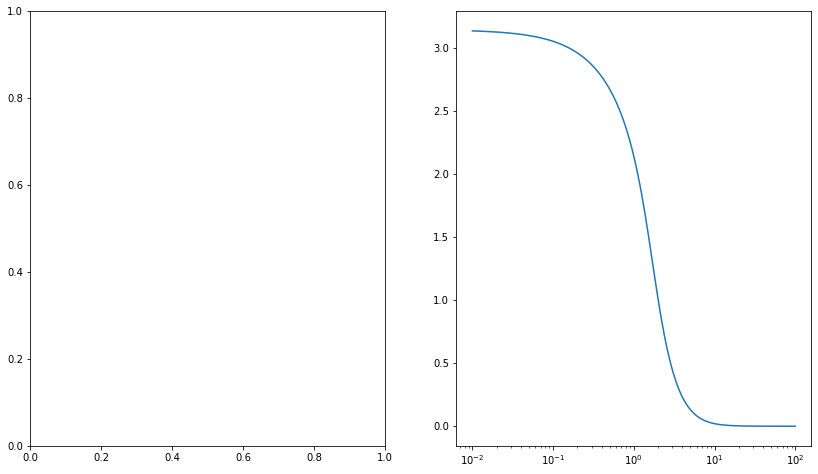

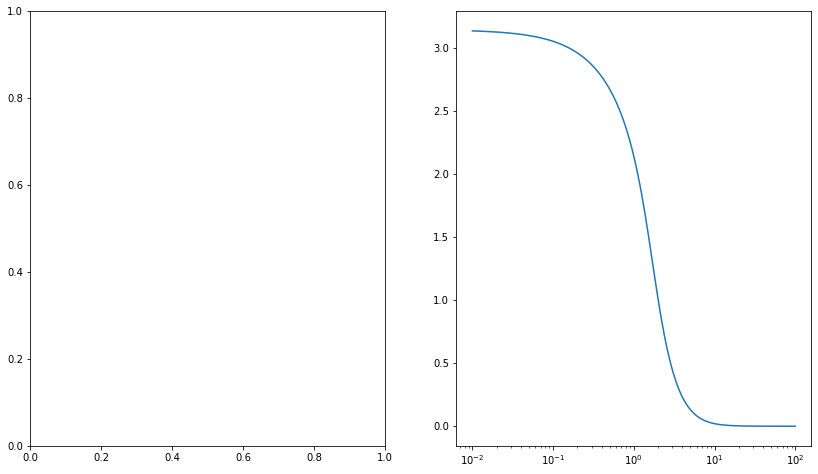

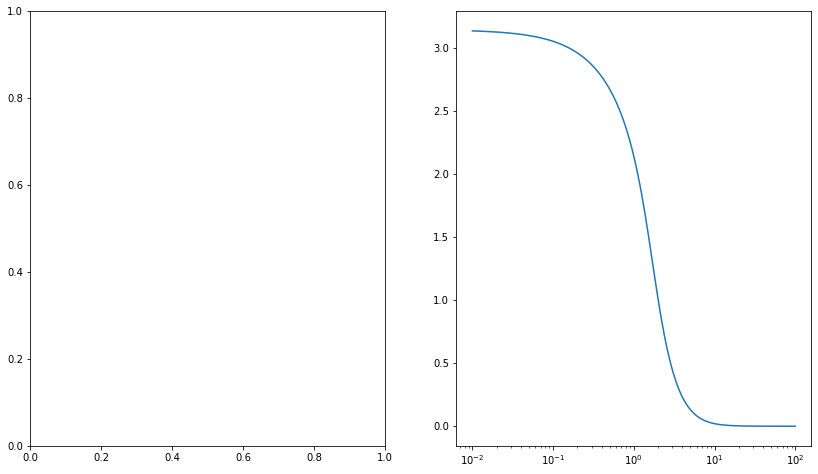

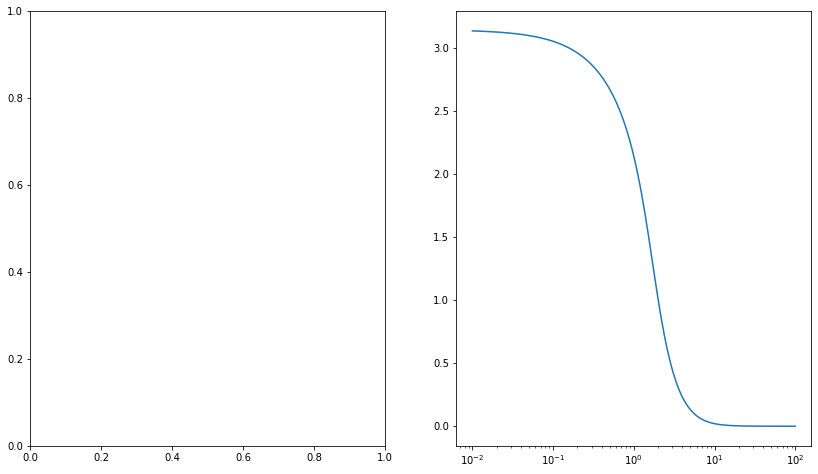

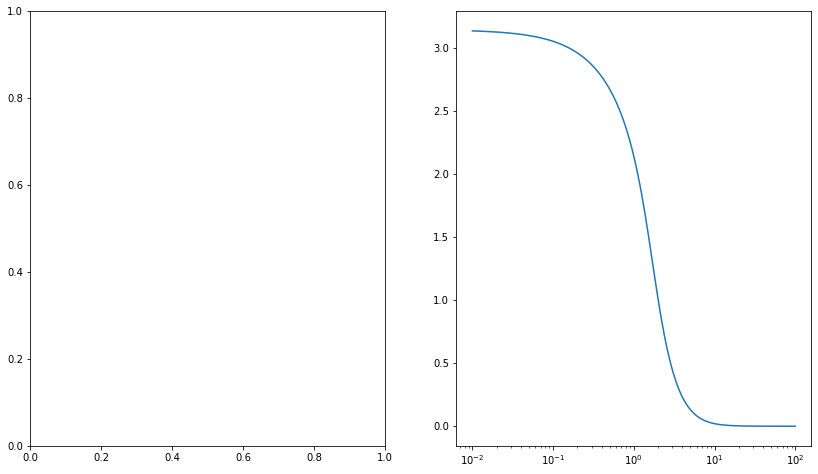

In [ ]:
#define list of denominators
import numpy as np
denominators = [np.poly1d([1,2,1]),
                np.poly1d([1,0,2]),
                np.poly1d([1,0,2]),
                np.poly1d([1,1]),
                np.poly1d([1,1]),
                np.poly1d([1,4,4]),
                np.poly1d([1,2,4,1]),
                np.poly1d([1,3,1]),
                np.poly1d([1,8,15]),
                np.poly1d([1,6,-7]),
                np.poly1d([1,1]),
                np.poly1d([1,-1]),
                np.poly1d([1,2]),
                np.poly1d([1,2]),
               ]
                    

#for each denominator from list - calculate roots
for A in denominators:
    w=np.logspace(-2,2,1000)
    figMP, axsMP = plt.subplots(1, 2, figsize=default_figsize)
    polynom=A
    poles=np.roots(polynom)
    axsMP[1].semilogx(w,F,label=str(idx))
    #print("mianownik={} bieguny={}".format(A,poles))
    print("mianownik \n",A,"\n","bieguny",poles)

----
## 3. Sprawdź właściwości systemów
-----------------
* na 1. wykresie umieść charakterystyki amplitudowe wszystkich układów
* na 2. wykresie umieść charakterystyki fazowe wszystkich układów
* na 3. wykresie zaznacz połóożenie zer biegonów dla wszystkich układów

Transmitancje układów:
$$H_1(s) = {{s^2+6s+8} \over {s^2+2s+ 3}}$$
$$H_2(s) = {{s^2-2s-8} \over {s^2+2s+ 3}}$$
$$H_3(s) = {{s^2-6s+8} \over {s^2+2s+ 3}}$$
$$H_4(s) = {{s^2+2s-8} \over {s^2+2s+ 3}}$$

Wskaż układ minimalnofazowy



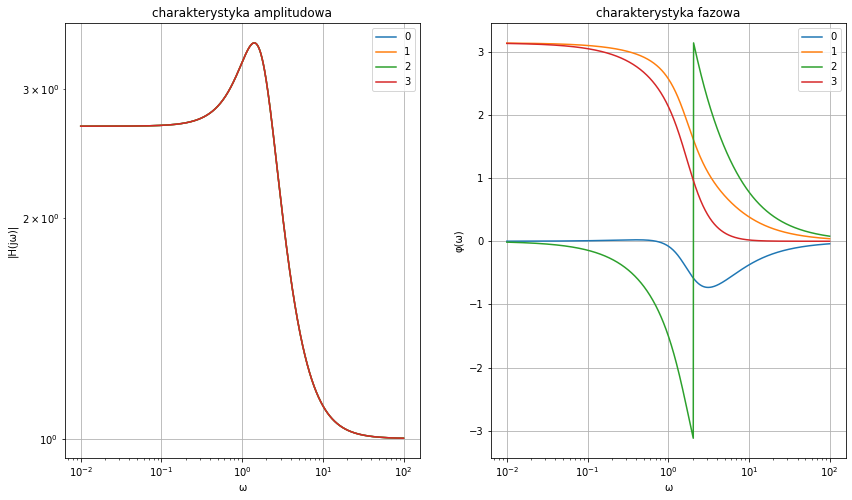

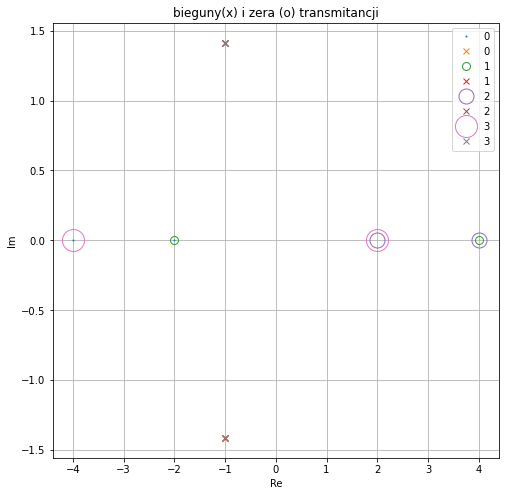

In [11]:
#define list of numerators
numerators = [[1, 6, 8],
              [1,-2,-8],
              [1,-6, 8],
              [1, 2,-8]
]
#define denominator
denominator = [1, 2, 3]
w=np.logspace(-2,2,1000)
s=w*1j


figMP, axsMP = plt.subplots(1, 2, figsize=default_figsize) #wskaźniki na dany wykres, wykres
figZP, axZP  = plt.subplots(1, 1, figsize=poles_figsize  )

for idx, licznik in enumerate(numerators):
    
    #charakterystyka amplitudowa 
    B=np.poly1d(licznik)
    A=np.poly1d(denominator)
    H=B(s)/A(s)
    M=np.abs(H)
    axsMP[0].loglog(w,M,label=str(idx))
    axsMP[0].legend()
        
    #charakterystyka fazowa
    F=np.angle(H)
    axsMP[1].semilogx(w,F,label=str(idx))
    axsMP[1].legend()
    
    #zera transmitancji
    zero=np.roots(B)
    bieguny=np.roots(A)
    axZP.plot(zero.real, zero.imag,'o',markerfacecolor='none', markersize=1+idx*7 ,label=str(idx))
    axZP.plot(bieguny.real, bieguny.imag,'x',label=str(idx))
    axZP.legend()
    

axsMP[0].set_title("charakterystyka amplitudowa")
axsMP[0].set_xlabel("ω")
axsMP[0].set_ylabel("|H(jω)|")
axsMP[0].grid() 
axsMP[1].set_title("charakterystyka fazowa")
axsMP[1].set_xlabel("ω")
axsMP[1].set_ylabel("φ(ω)")
axsMP[1].grid()
#figMP.tight_layout()
#figMP.show()

axZP.set_title("bieguny(x) i zera (o) transmitancji")
axZP.set_xlabel("Re")
axZP.set_ylabel("Im") 
axZP.grid()
#figZP.tight_layout()
#figZP.show()
#niebieski naj bd optymalny bo najmniej zmienia faze
#
#